# Lista de Exercícios 02

O exercício abaixo deve ser desenvolvido em aula individualmente ou em duplas e entregue até a da 03/10.

##   

__1)__ Utilizando a base do [_CIFAR10_](https://www.cs.toronto.edu/~kriz/cifar.html) do _Keras_, base essa com 10 categorias de imagens conforme descritas abaixo:

<br>

```python
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']
```

<br>

Desenvolva __pelo menos 2 redes neurais__ utilizando CNNs para fazer a classificação das imagens da base _CIFAR10_.

Durante o desenvolvimento das redes, teste utilizar combinações com a camada _DropOut_, que como comentado em aula, serve para desativar alguns neurônios da rede de forma a forçar a rede a generalizar. A camada _Dropout_ pode ser aplicada como uma camada posterior as camadas densas ou mesmo como um parâmetro dentro da _Dense_.

<br>

<img src="https://quantdare.com/wp-content/uploads/2021/05/Webp.net-gifmaker.gif" width = 500>

<br>

## Resolução:

In [1]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libs de Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix

# Libs para Redes Neurais
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Baixando a nossa base de dados
cifar10 = tensorflow.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [12]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

In [13]:
# Olhando os shapes
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [14]:
# Olhando a target
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
train_images = train_images / 255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
test_images = test_images/255.0

In [70]:
# Montar as camadas
cnn = keras.Sequential([
      keras.layers.Conv2D(32,                         # numero de filtros
                          (3,3),                      # dimensão do filtro
                          activation = 'relu',        # função de ativação
                          input_shape = (32, 32, 3)), # tamanho da entrada
      keras.layers.MaxPooling2D((2, 2)), # tamanho da janela
      
      keras.layers.Flatten(),            # Vetoriza as matrizes
      keras.layers.Dense(32),
      keras.layers.Dense(64),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(128),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(256),
      keras.layers.Dense(10, activation = 'softmax')
])

In [71]:
# Crie um compile() com os seguintes parametros:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 7200)              0         
                                                                 
 dense_17 (Dense)            (None, 32)                230432    
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [72]:
#EarlyStoping
early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0.002,
                           patience = 10,
                           verbose = 1,
                           mode = 'auto')

In [73]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
cnn.fit(train_images,
        train_labels,
        epochs = 100,
        verbose = 1,
        validation_data = (test_images, test_labels),
        callbacks = [early_stop])

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4776 - accuracy: 0.4731 - val_loss: 1.2380 - val_accuracy: 0.5633
Epoch 2/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2201 - accuracy: 0.5734 - val_loss: 1.1849 - val_accuracy: 0.5862
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1174 - accuracy: 0.6091 - val_loss: 1.1083 - val_accuracy: 0.6099
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0459 - accuracy: 0.6371 - val_loss: 1.1713 - val_accuracy: 0.5981
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9966 - accuracy: 0.6534 - val_loss: 1.1391 - val_accuracy: 0.6078
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9550 - accuracy: 0.6682 - val_loss: 1.1584 - val_accuracy: 0.6026
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9189 - accuracy: 0.6788 - val_loss: 1.0868 

In [74]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels = np.argmax(cnn.predict(test_images), axis = -1)

313/313 [==============================] - 1s 3ms/step


In [75]:
# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.46      0.71      0.56       642
           1       0.66      0.80      0.72       816
           2       0.42      0.44      0.43       942
           3       0.38      0.43      0.41       885
           4       0.69      0.41      0.52      1690
           5       0.35      0.60      0.45       587
           6       0.81      0.54      0.65      1489
           7       0.68      0.63      0.65      1073
           8       0.72      0.71      0.72      1018
           9       0.65      0.75      0.69       858

    accuracy                           0.58     10000
   macro avg       0.58      0.60      0.58     10000
weighted avg       0.62      0.58      0.58     10000



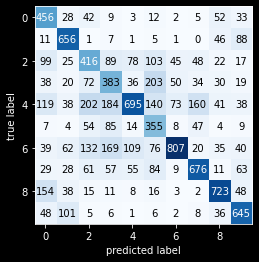

In [76]:
cm = confusion_matrix(pred_labels, test_labels)
plot_confusion_matrix(conf_mat = cm)
plt.show()

In [89]:
# Montar as camadas
cnn = keras.Sequential([
      keras.layers.Conv2D(32,                         # numero de filtros
                          (3,3),                      # dimensão do filtro
                          activation = 'relu',        # função de ativação
                          input_shape = (32, 32, 3)), # tamanho da entrada
      
      keras.layers.MaxPooling2D((1, 1)), # tamanho da janela
      
      keras.layers.Flatten(),            # Vetoriza as matrizes
      keras.layers.Dense(32),
      keras.layers.Dense(64),
      keras.layers.Dense(128),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(256),
      keras.layers.Dense(10, activation = 'softmax')
])

In [90]:
# Crie um compile() com os seguintes parametros:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 28800)             0         
                                                                 
 dense_47 (Dense)            (None, 32)                921632    
                                                                 
 dense_48 (Dense)            (None, 64)                2112      
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                     

In [91]:
#EarlyStoping
early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0.002,
                           patience = 10,
                           verbose = 1,
                           mode = 'auto')

In [92]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
cnn.fit(train_images,
        train_labels,
        epochs = 100,
        verbose = 1,
        validation_data = (test_images, test_labels),
        callbacks = [early_stop])

Epoch 1/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5427 - accuracy: 0.4456 - val_loss: 1.3691 - val_accuracy: 0.5178
Epoch 2/100
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2802 - accuracy: 0.5519 - val_loss: 1.2414 - val_accuracy: 0.5626
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1378 - accuracy: 0.6011 - val_loss: 1.2712 - val_accuracy: 0.5644
Epoch 4/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0453 - accuracy: 0.6348 - val_loss: 1.2791 - val_accuracy: 0.5631
Epoch 5/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9546 - accuracy: 0.6674 - val_loss: 1.3183 - val_accuracy: 0.5561
Epoch 6/100
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8792 - accuracy: 0.6931 - val_loss: 1.3505 - val_accuracy: 0.5549
Epoch 7/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8141 - accuracy: 0.7164 - val_loss: 1

In [93]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels = np.argmax(cnn.predict(test_images), axis = -1)

313/313 [==============================] - 1s 4ms/step


In [94]:
# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1012
           1       0.66      0.72      0.69       920
           2       0.42      0.41      0.42      1036
           3       0.49      0.33      0.39      1520
           4       0.48      0.46      0.47      1047
           5       0.45      0.45      0.45       987
           6       0.55      0.65      0.60       854
           7       0.53      0.67      0.59       795
           8       0.68      0.68      0.68      1001
           9       0.59      0.71      0.64       828

    accuracy                           0.55     10000
   macro avg       0.55      0.57      0.55     10000
weighted avg       0.54      0.55      0.54     10000



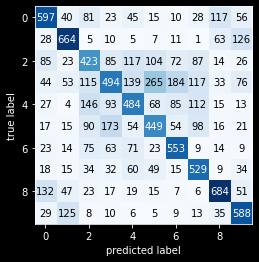

In [95]:
cm = confusion_matrix(pred_labels, test_labels)
plot_confusion_matrix(conf_mat = cm)
plt.show()